# Lab Assignment One: Exploring Table or Text Data

## 1. Business Understanding
The data set “2015 Flight Delays and Cancellations” has been downloaded from kaggle.com and consists of _______  observations and _______ attributes, which are both numerical and categorical. The data of on-time performance of domestic flights operated by large air carriers is tracked by The US Dept. of Transportation’s Bureau of Transportation Statistic and published in DOT’s monthly Air Travel Consumer Report. It includes the summary information on the number of on-time, delayed, canceled, and diverted flights.

This data can be useful in identifying trends in flight delays and cancellations and aid in the classification of a flight. We can draw some underlying pattern between collection of attributes of a flight that might yield a rule for the chance of flight delay or cancellation. This can help flyers know regarding the flight delay/cancellation, in case any and give them enough advance notifications to change their plans as needed.

Data visualizing on attributes, studying the relationships between them, and other methods, we can understand the crucial issues leading to the flight’s delay/cancellation.

Data Analysis can help the flyers get an idea 

Dataset: 2015 Flight Delays and Cancellations URL: https://www.kaggle.com/usdot/flight-delays
Question Of Interest: Which airline should you fly on to avoid significant delays?

## 2. Data Understanding

### 2.1 Data Description

In [130]:
# load the Airlines Delay dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

low_memory=False
df = pd.read_csv('file:///Users/piyushmetkar/Documents/SMU/Notes/Spring 18/7324 Machine Learning in Python/Lab1/flights_Trimmed_Data1.csv') # read in the csv file
# read in the csv file

df.head()



('Pandas:', u'0.20.3')
('Numpy:', '1.13.3')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
#Find the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 31 columns):
YEAR                   10100 non-null int64
MONTH                  10100 non-null int64
DAY                    10100 non-null int64
DAY_OF_WEEK            10100 non-null int64
AIRLINE                10100 non-null object
FLIGHT_NUMBER          10100 non-null int64
TAIL_NUMBER            10087 non-null object
ORIGIN_AIRPORT         10100 non-null object
DESTINATION_AIRPORT    10100 non-null object
SCHEDULED_DEPARTURE    10100 non-null int64
DEPARTURE_TIME         9711 non-null float64
DEPARTURE_DELAY        9711 non-null float64
TAXI_OUT               9710 non-null float64
WHEELS_OFF             9710 non-null float64
SCHEDULED_TIME         10100 non-null int64
ELAPSED_TIME           9692 non-null float64
AIR_TIME               9692 non-null float64
DISTANCE               10100 non-null int64
WHEELS_ON              9704 non-null float64
TAXI_IN                9704 non-null float64

In [139]:
#Data summary
df.describe()

print('=================')

#Data description
data_des = pd.DataFrame()
data_des['Features'] = df.columns

data_des['Description'] = ['Year of the Flight Trip','Month of the Flight Trip','Day of the Flight Trip','Day of week of the Flight Trip','Airline Identifier','Flight Identifier','Aircraft Identifier','Starting Airport','Destination Airport','Planned Departure Time','WHEEL_OFF - TAXI_OUT','Total Delay on Depature','The time duration elapsed between departure from the origin airport gate and wheels off','The time point that the wheels of aircraft leave the ground','Planned time amount needed for the flight trip','AIR_TIME+TAXI_IN+TAXI_OFF','The time duration between wheels_off and wheels_on time','Distance between two airports','The time point that the wheels of aircraft touch on the ground','The time duration elapsed between wheels-on and gate arrival at the destination airport','Planned arrival time','WHEELS_ON+TAXI_IN','ARRIVAL_TIME-SCHEDULED_ARRIVAL','Aircraft landed on airport that out of schedule','Flight Cancelled (1 = cancelled)','Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security','Delay caused by air system in minutes','Delay caused by security in minutes','Delay caused by the airline in minutes','Delay caused by aircraft in minutes','Delay caused by weather in minutes']

data_des['Datatype'] = ['Numeric','Numeric','Numeric','Numeric','String','Numeric','String','String','String','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','Numeric','String','Numeric','Numeric','Numeric','Numeric','Numeric']

data_des['Values'] = ['2015','1-3','1-31','1-7','Nominal','1-9794','Nominal','Nominal','Nominal','0-2359','0-2359','-61 - 1988','0-225','0-2359','20-718','15-766','7-687','31-4983','0-2359','1-202','0-2359','0-2359','-82 - 1971','0/1','0/1','A/B/C/D','0-830','0-241','0-1971','0-1313','0-1152',]

data_des

,Features,Description,Datatype,Values
0,YEAR,Year of the Flight Trip,Numeric,2015
1,MONTH,Month of the Flight Trip,Numeric,1-3
2,DAY,Day of the Flight Trip,Numeric,1-31
3,DAY_OF_WEEK,Day of week of the Flight Trip,Numeric,1-7
4,AIRLINE,Airline Identifier,String,Nominal
5,FLIGHT_NUMBER,Flight Identifier,Numeric,1-9794
6,TAIL_NUMBER,Aircraft Identifier,String,Nominal
7,ORIGIN_AIRPORT,Starting Airport,String,Nominal
8,DESTINATION_AIRPORT,Destination Airport,String,Nominal
9,SCHEDULED_DEPARTURE,Planned Departure Time,Numeric,0-2359


### 2.2 Cleaning the Dataset
First we figure out the missing data from the data set. For that purpose we are using the missingno package which helps visualise the NaN values in the dataset. Depending on the column, we will decide wheather we can igonre, impute or delete it's rows. 

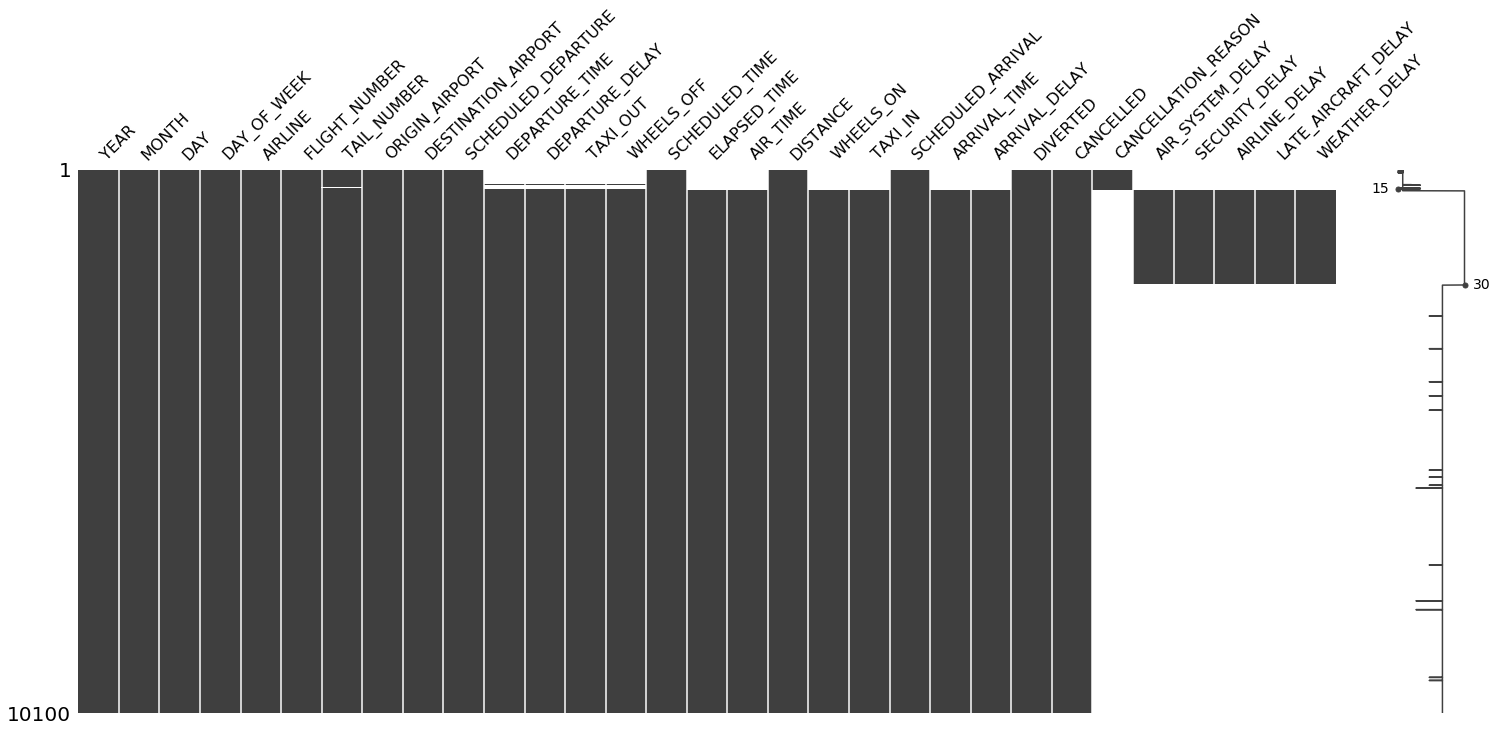

In [133]:
import missingno as mn
mn.matrix(df.sort_values(by=["CANCELLATION_REASON","AIR_SYSTEM_DELAY",]))

Here we can see that most of the Nan values are present in the 'CANCELLATION_REASON' column. In the dataset, if a flight is cancelled, it's reason is given in the 'CANCELLATION_REASON' column. Since a very small fraction of flights are cancelled most of the values in the columns are empty.

There are 4 reasons for cancellation of flight, each of which are given as an alphabet A-D in the column metadata. The reasons are:
A - Airline/Carrier
B - Weather
C - National Air System
D - Security

So if the flight is not cancelled, there is no reason and hence it is left blank. We will replace all the blank columns by X which means no reason for no cancellation.

In [134]:
df['CANCELLATION_REASON']=df['CANCELLATION_REASON'].fillna('X')

There are 5 different reasons for delay of flights. There's a column for each delay time for each reason. If the flight is delayed by one of the reason, the delay time in minutes is given in it's respective column. If the flight is not delayed at all, all it's columns for reasons of delay are kept blank in the dataset.

We are going to replace all these blank cells by value 0 as it logically means that the flight is not delayed at all.

In [135]:
df['AIR_SYSTEM_DELAY']=df['AIR_SYSTEM_DELAY'].fillna(0)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].fillna(0)
df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].fillna(0)

In [136]:
df.head()
print('**********')

dataRecords = pd.DataFrame.from_records(df)
query = dataRecords['CANCELLATION_REASON'].str.contains('|'.join(['A', 'B', 'C', 'D']))
data_filtered = dataRecords[query]
#print(data_filtered)

**********


## 3. Data Visualization

### 3.1 Delay by Airline
